<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/ComputingError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Module 1: Computing Errors



$\quad$ $Ankit Rijal$

$\quad$ $Min Sun Kim$

$\quad$ $Tylar Gifford$

$\quad$ $CPSMA - 441301$

$\quad$ $Dr. Nicolas Jacob$




To begin, I will list definition of some computing errors. 

In [ ]:
def true_error(est_value, actual_value):
  trueError = actual_value - est_value
  return trueError

def relative_error(est_value, actual_value):
  relative_error = (actual_value - est_value)/actual_value
  return relative_error

def approximate_error(previous_approximation, present_approximation):
  approximate_error = present_approximation - previous_approximation
  return approximate_error

def relative_approxiamte_error(previous_approximation, present_approximation):
  relative_approximate_error = (present_approximation - previous_approximation)/present_approximation
  return relative_approximate_error
 




In the above list, I have used other functions and some naming conventions that helps in directing where do each input belong. 


**Taylor Expansion**

Here, I will estimate for $e^{x}$ centered at c=3 

$\qquad$ $\qquad$ $f_{n}(x)$ = $\sum_{i=0}^{n}$ $\frac{e^{c(n)}}{n!} $$(x-c)^n$

Since, 

$\qquad$ $\frac{d}{dx} $$e^x$ = $e^x$ 

So,

$f_{n}(x)$ = $\sum_{i=0}^{n}$ $\frac{e^c}{n!} $$(x-c)^n$ 

$\qquad$= $\sum_{i=0}^{n}$ $\frac{e^3}{n!}$ $(x-3)^n$ 

I will now import the math package to compute the above. 
          
          
     

In [ ]:
import math

def tylorPolynomialTerm(degree, input):
  term = (math.exp(3)/math.factorial(degree))*(input-3)**degree
  return term

def tylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum += tylorPolynomialTerm(i, input)
  return sum

By using package plotly, I am going to create a table that is useful while making visualizations.

In [ ]:
degree = []
actual_value = []
est_value = []
abs_error = []
rel_error = []
app_error = []
rel_app_error = []
for i in range(0,21):
  degree.append(i)
for i in degree:
  actual_value.append(math.exp(3+0.1))
  est_value.append(tylorPolynomial(i, 3.1))
  abs_error.append(true_error(est_value[i],actual_value[i]))
  rel_error.append(relative_error(est_value[i],actual_value[i]))
for i in range(0,19):
  app_error.append(approximate_error(est_value[i],est_value[i+1]))
  rel_app_error.append(relative_approxiamte_error(est_value[i],est_value[i+1]))

print(rel_app_error)



In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(values=['Degree', 'Actual Value', 'Estimated Value','Absolute Error','Relative Error','Approximate Error','Relative Approximate Error'],
                line_color='darkslategray',
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[degree, actual_value, est_value, abs_error, rel_error, app_error,rel_app_error ], 
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

fig.update_layout(width=1500, height=800)
fig.show()


As we can see in the above table, the error has surpassed the floating point error by the ninth degree. 

Now, I am going to use additonal packages to graph the 5th Taylor approximation and the function. 

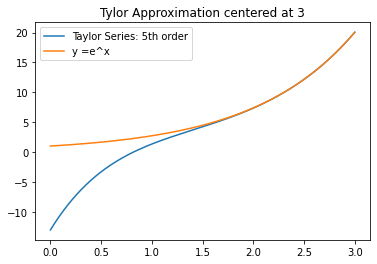

In [ ]:
from matplotlib import pyplot as plot
import numpy as npy

pi = math.pi
sqrt2 = math.sqrt(2)

x = npy.arange(0, 3, .001)

fig, ax = plot.subplots()  
ax.plot(x, tylorPolynomial(5,x), label='Taylor Series: 5th order')
ax.plot(x, npy.e**x, label='y =e^x')
ax.set_title('Taylor Approximation Centered at 3')
ax.legend()  

I have tried using various x values until I achieved the desired window size. 

I am now going to try the 20th order to check where the graph deviation will start for this one. 

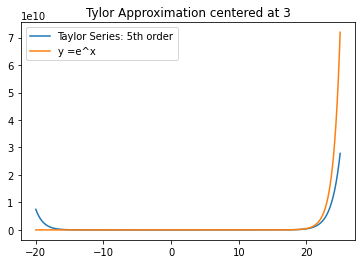

In [ ]:
x = npy.arange(-20, 25, .001)

fig, ax = plot.subplots()  
ax.plot(x, tylorPolynomial(20,x), label='Taylor Series: 5th order')
ax.plot(x, npy.e**x, label='y =e^x')
ax.set_title('Tylor Approximation centered at 3')
ax.legend()  